# Car dekho used car price prediction EDA

Life Cycle of Machine Learning project:
    1.Understanding Probleme Statement
    2.Data Collection
    3.Exploratory Data Analysis
    4.Data Cleaning
    5.Data Pre processing
    6.Model Training
    7.Choosing Best Model

# 1.Problem Statement:
- The data comproses of used cars sold imformation alaong with the important car features.
- User need to predict the Used car price based on the features.

# 2.Data Collection:

# 2.1 Importing Data and Required Packages

**Importing required Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from six.moves import urllib
import os

warnings.filterwarnings('ignore')
%matplotlib inline

**Scrapping the dataset from the website using urllib**

In [5]:
#Website url
Website_url="https://raw.githubusercontent.com/aravind9722/datasets-for-ML-projects/main/cardekho_dataset.csv"
#directory to download the dataset
Directory='./data/'
os.makedirs(Directory,exist_ok=True)
#file name for the dataset
File_name=os.path.basename(Website_url)
#file path
File_path=os.path.join(Directory,File_name)
#scrap usinf urllib
urllib.request.urlretrieve(Website_url,File_path)

('./data/cardekho_dataset.csv', <http.client.HTTPMessage at 0x162f7248760>)

In [11]:
df=pd.read_csv(File_path,index_col=[0])

**First 5 rows of data**

In [16]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


**Shape of the dataset:Number of rows and columns in the data**

In [19]:
df.shape

(15411, 13)

**Statistic summary for dataset**

In [21]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


**Checking datatypes in the datset**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


# 3.Exploratory Data Analysis

**Checking null values in the data**

In [96]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

**Checking Numerical Features in the data**

In [42]:
Numerical_features=[features for features in df.columns if df[features].dtype!='O']
print("We have {} number of Numerical Features:{}".format(len(Numerical_features),Numerical_features))

We have 7 number of Numerical Features:['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


Report:We have 7 Numerical features in the dataset.and following are te informations.
- vehicle_age:Age of the Vehicle in years
- km_driven:Kilometers driven by the car in vehicle_age
- mileage:Mileage of the car
- engine:Engine Capacity in CC
- max_power:Max power produced by the car
- seats:Number of seats in the car
- selling_price:selling price of the car.

**Checking Categorical Features in the data**

In [43]:
Categorical_features=[features for features in df.columns if df[features].dtype=='O']
print("We have {} number of Categorical Features:{}".format(len(Categorical_features),Categorical_features))

We have 6 number of Categorical Features:['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [68]:
for i in Categorical_features:
    print(i,":",df[i].unique())
    print('------------------------------------------------------------------------------------------')

car_name : ['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endeavour'
 'Mahindra KUV' 'Honda Jazz' 'BMW 3' 'Audi A4' 'Tata Tigor'
 'Maruti Ertiga' 'Tata Safari' 'Mahindra Thar' 'Tata Hexa'
 'Land Rover Rover' 'Maruti Eeco' 'Audi A6' 'Mercedes-Benz E-Class'
 'Audi Q7' 'BMW Z4' 'BMW 6' 'Jaguar XF' 'BMW X5' 'MG Hector' 'Honda Civic'
 'Isuzu D-Max' 'Porsche Cayenne' 'BMW X1' 'Skoda Rapid' 'Ford Freesty

Report:We have 6 Categorical features
- car_name:model of the car along with the brand name
- brand:name of the car company
- model:Car model
- seller_type:it have seller information like individual or the dealer or Trustmark dealer
- fuel_Type:petrol,diesel,CNG,LPG or electric
- transmission_type:Manual or automatic

**Check the number of individual categorical variables**

In [77]:
for i in Categorical_features:
    print(i,'\n',df[i].value_counts())
    print('------------------------------------------------------------------------------------------')

car_name 
 Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
                     ... 
Mercedes-AMG C          1
Tata Altroz             1
Ferrari GTC4Lusso       1
Hyundai Aura            1
Force Gurkha            1
Name: car_name, Length: 121, dtype: int64
------------------------------------------------------------------------------------------
brand 
 Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley     

**Normalizing above data on the scale of 100**
 
 
 Normalizing is to maintain same scale for all features

In [83]:
for i in Categorical_features:
    print(i,'\n',df[i].value_counts(normalize=True)*100)
    print('------------------------------------------------------------------------------------------')

car_name 
 Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: car_name, Length: 121, dtype: float64
------------------------------------------------------------------------------------------
brand 
 Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0

Report:
Highest number of used cars sold:
- Brand:Maruti
- Model:Hyundai I20
- Seller type:Dealer
- Fuel type:Petrol
- Transmission:Manual

# Univariate Analysis-Numerical Features
Univariate analysis is to understand distribution of a single feature.

We can use KDE plot for Numerical features and Bar chart for Categorical features.

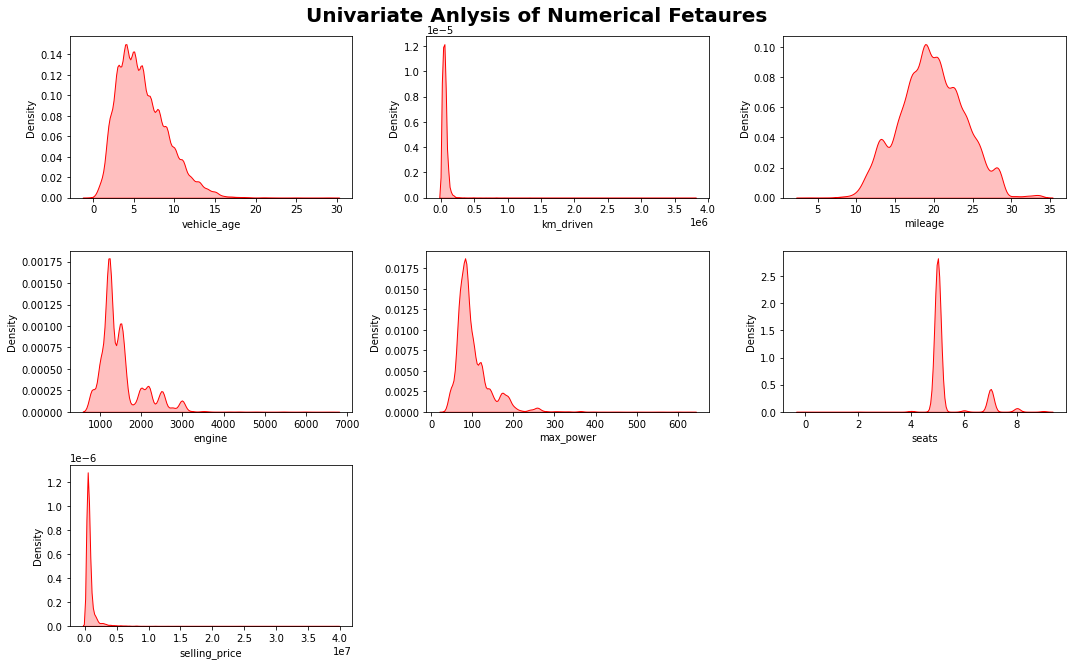

In [153]:
plt.figure(figsize=(15,15))
plt.suptitle(t='Univariate Anlysis of Numerical Fetaures',fontsize=20,fontweight='bold')

for i in range(len(Numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[Numerical_features[i]],shade=True,color='r')
    plt.xlabel(Numerical_features[i])
    plt.tight_layout()

**Box plots for Numerical Fetaures to check the Outliers**

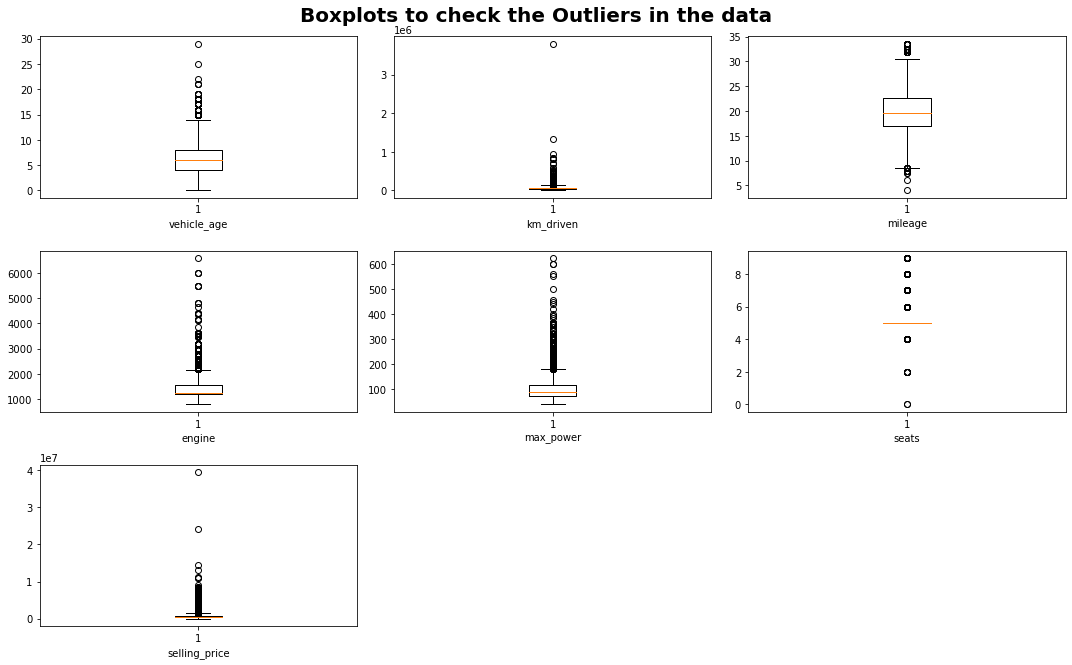

In [191]:
plt.figure(figsize=(15,15))
plt.suptitle(t='Boxplots to check the Outliers in the data',fontsize=20,fontweight='bold')
for k in range(0,len(Numerical_features)):
    plt.subplot(5,3,k+1)
    plt.boxplot(x=df[Numerical_features[k]])
    plt.xlabel(Numerical_features[k],)
    plt.tight_layout()

Report:
- Vehicle Age,Engine capcity,Max power,seats and selling price are right skewed.
- Outliers observed in all the features based on the boxplots

# Univariate Analysis-Categorical Features

Count plots are used for the Categorical feature univariate analysis

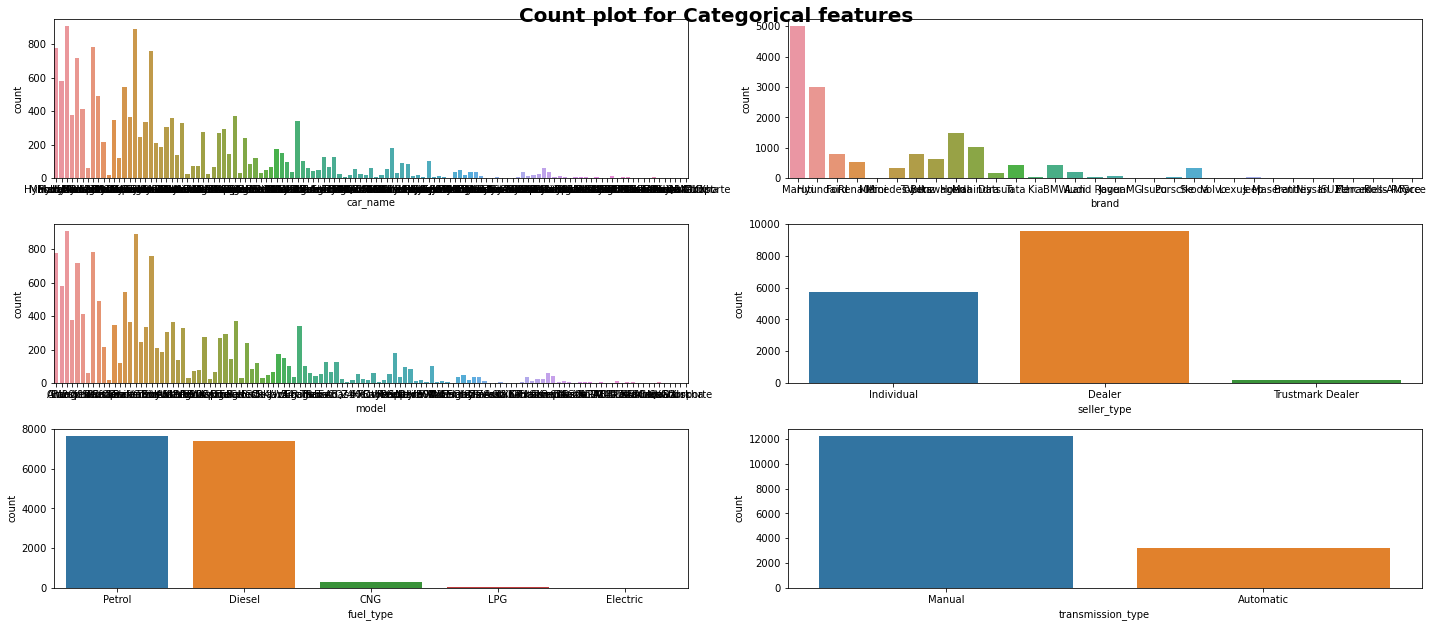

In [214]:
plt.figure(figsize=(20,20))
plt.suptitle(t='Count plot for Categorical features',fontsize=20,fontweight='bold',alpha=1.0)

for m in range(len(Categorical_features)):
    plt.subplot(7,2,m+1)
    sns.countplot(x=df[Categorical_features[m]])
    plt.tight_layout()

# Multivariate Analysis
Multivariate analysis is the analysis of more than one feature in the data.

**check multi collinearity of the numerical features in the data**


Multicollineariyt- the high correlation between two or more explanatory variables

In [217]:
df.corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


**plotting heatmap for the correlation**

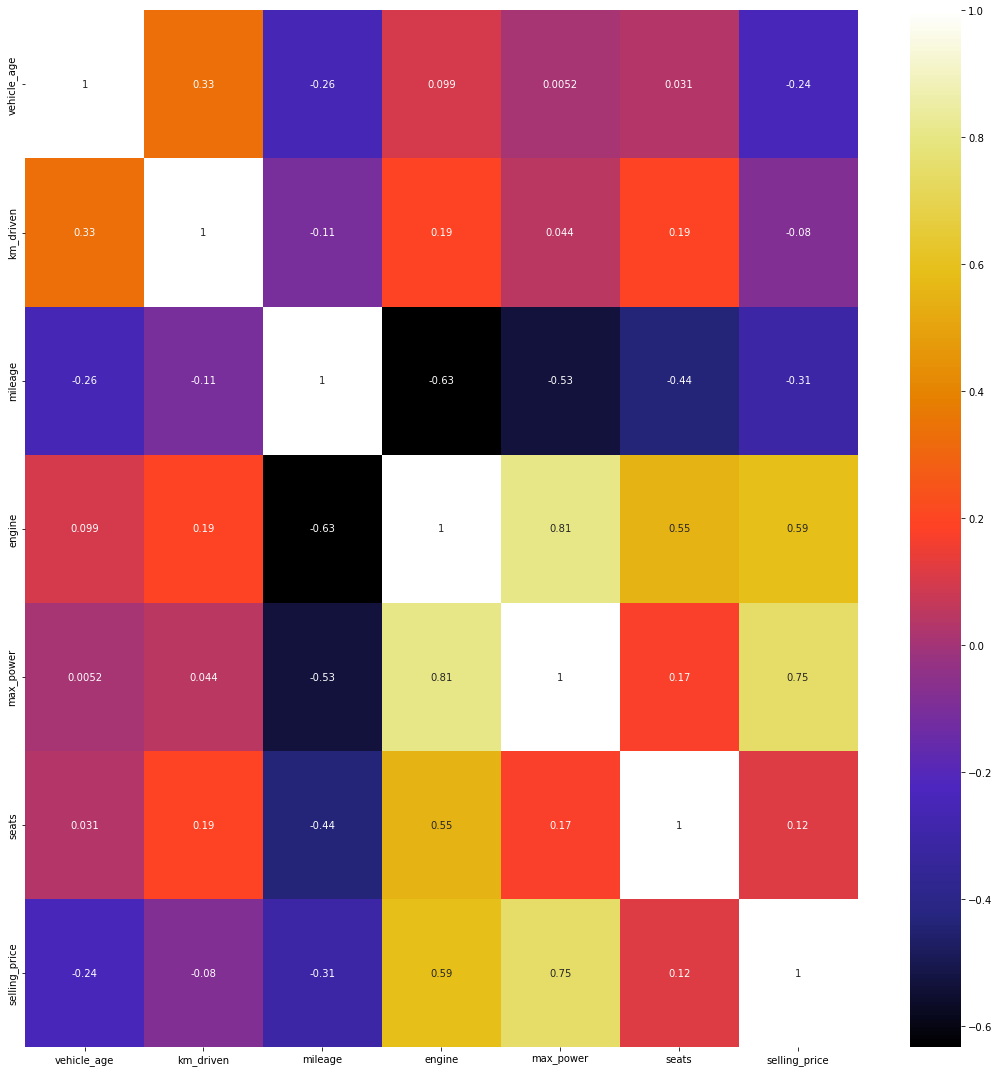

In [225]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='CMRmap')
plt.tight_layout()

**Report**


1.Traget variable selling price has positive correlation with the max power and the Engine Capacity.and Negative Correlation with with Features like Vehicle age.


2.Max power has positive correlation with the engine capacity.

**check multi collinearity of the categorical features in the data**

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e Selling Price**

In [249]:
from scipy.stats import chi2_contingency
chi=[]
for k in Categorical_features:
    if chi2_contingency(pd.crosstab(df['selling_price'],df[k]))[1]<0.05:
        chi.append('Reject the Null Hypothesis')
    else:
        chi.append('Fail to reject the null hypothesis')
results=pd.DataFrame(data=[Categorical_features,chi]).T
results.columns=['Columns','Hypothesis_results']

In [250]:
results

,Columns,Hypothesis_results
0,car_name,Reject the Null Hypothesis
1,brand,Reject the Null Hypothesis
2,model,Reject the Null Hypothesis
3,seller_type,Reject the Null Hypothesis
4,fuel_type,Reject the Null Hypothesis
5,transmission_type,Reject the Null Hypothesis


**Checking for null values**

In [253]:
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

Report:
No NaN values observed in the data.

**Checking continous features in the data**

We are considering the numerical feature as a continous if the number of unique values in the feature are greatert than the 10

In [277]:
Continues_features=[features for features in Numerical_features if len(df[features].unique())>10]
print('The Number of Continuos features are:',len(Continues_features))
print(Continues_features)

The Number of Continuos features are: 6
['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


**Scatter plot for continuous features wrt to target feature ie selling price**

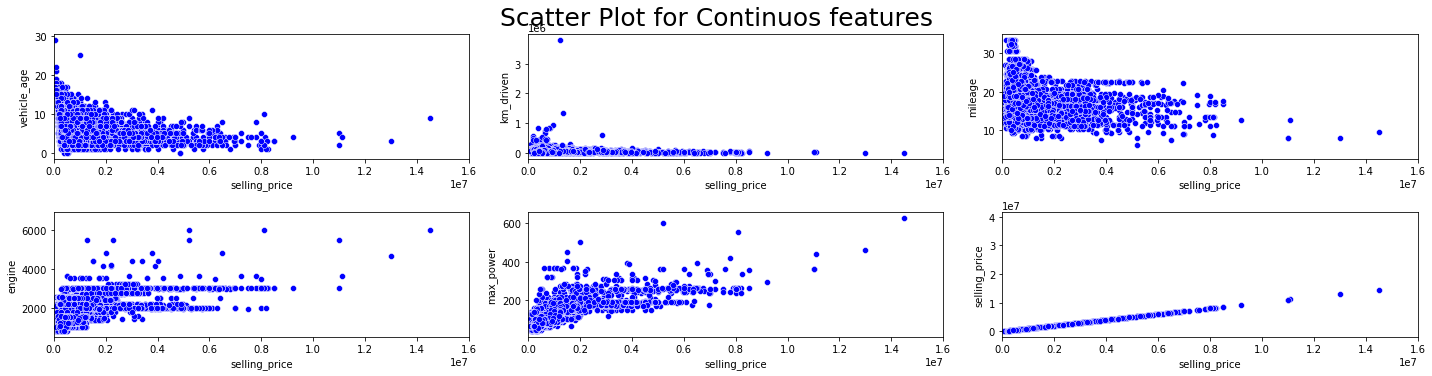

In [286]:
plt.figure(figsize=(20,20))
plt.suptitle(t='Scatter Plot for Continuos features',fontsize=25)

for i in range(len(Continues_features)):
    plt.subplot(8,3,i+1)
    sns.scatterplot(y=df[Continues_features[i]],x=df['selling_price'],color='b')
    plt.xlim(0,1.6e7)
    plt.tight_layout()

Report:

1.Selling price of the used car is more at less vehicle age.

2.Car price increasing with inc.in power and the engine Capacity.

3.High priced cars are giving less mailage.

# Visualization

**visulaize the target feature-selling price**

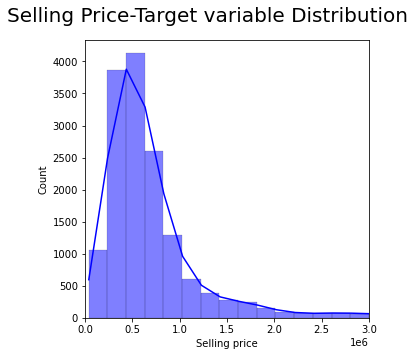

In [328]:
plt.figure(figsize=(5,5))
plt.suptitle('Selling Price-Target variable Distribution',fontsize=20,fontweight=20)
sns.histplot(df['selling_price'],kde=True,bins=200,color='b')
plt.xlabel('Selling price')
plt.ylabel('Count')
plt.xlim(0,3000000)
plt.tight_layout()

Report:
- Selling price data is right-skewed distribution.
- Most of the cars sold are in the range of 0.5 million.

# **Most selling cars**

In [329]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


Report:Most selling used car is Hyundai i20

In [366]:
df['car_name'].value_counts()[:10]

Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64

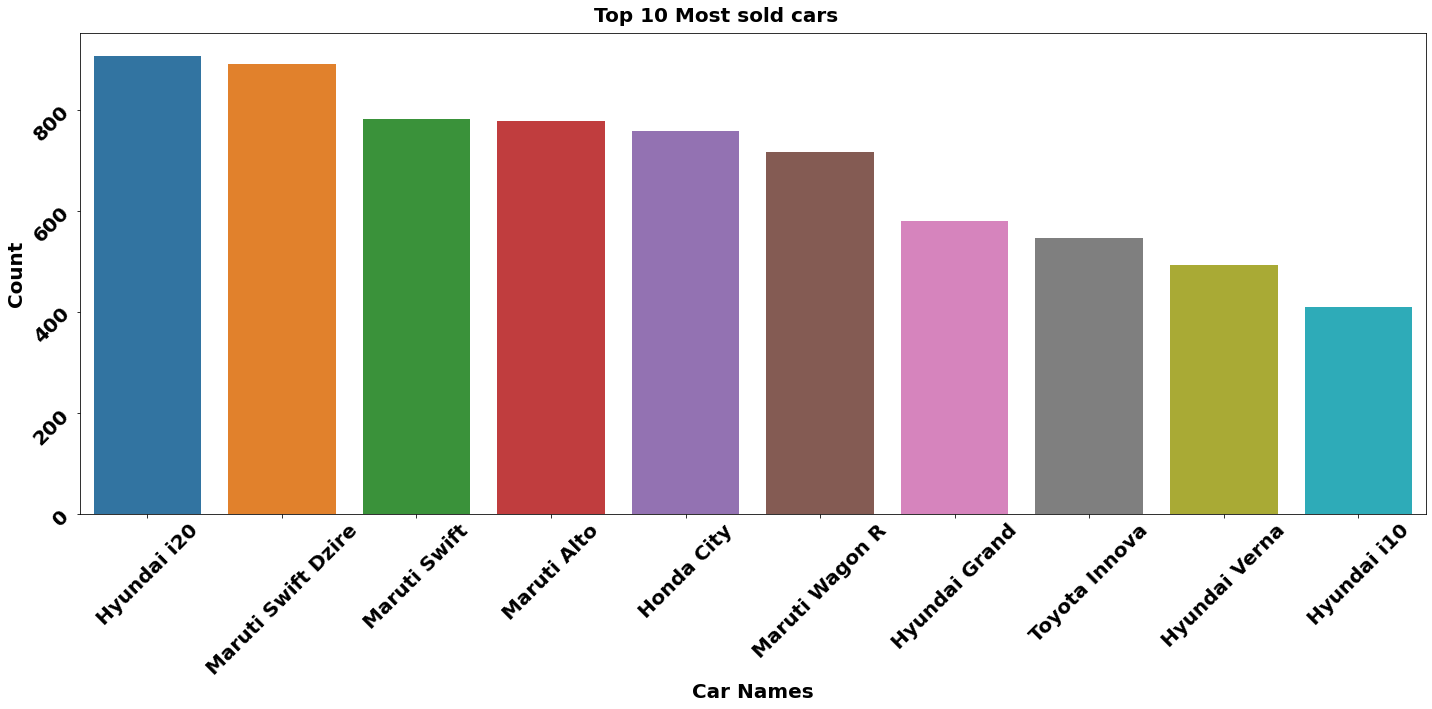

In [416]:
plt.figure(figsize=(20,10))
plt.suptitle(t='Top 10 Most sold cars',fontsize=20,fontweight='bold')
sns.countplot(x=df['car_name'],order=df['car_name'].value_counts()[:10].index)
plt.xlabel('Car Names',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')
plt.xticks(rotation=45,fontsize=20,fontweight='bold')
plt.yticks(rotation=45,fontsize=20,fontweight='bold')
plt.tight_layout()

**Mean price of the Hyundai i20**

In [429]:
df[df['car_name']=='Hyundai i20']

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
34,Hyundai i20,Hyundai,i20,3,25000,Individual,Petrol,Manual,17.19,1197,81.86,5,700000
44,Hyundai i20,Hyundai,i20,3,15000,Individual,Diesel,Manual,22.54,1396,88.73,5,850000
45,Hyundai i20,Hyundai,i20,3,40000,Individual,Petrol,Manual,18.60,1197,81.83,5,598000
67,Hyundai i20,Hyundai,i20,5,70000,Individual,Diesel,Manual,22.54,1396,88.73,5,750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19360,Hyundai i20,Hyundai,i20,4,25000,Individual,Petrol,Manual,18.60,1197,81.83,5,650000
19387,Hyundai i20,Hyundai,i20,11,99250,Individual,Petrol,Manual,17.00,1197,80.00,5,325000
19391,Hyundai i20,Hyundai,i20,6,50000,Dealer,Petrol,Automatic,15.00,1396,98.60,5,400000
19504,Hyundai i20,Hyundai,i20,8,120000,Individual,Petrol,Manual,18.50,1197,82.85,5,300000


In [439]:
i20_mean_price=df[df['car_name']=='Hyundai i20']['selling_price'].mean()
print('the mean price of Hyundai i20 is {} rupees'.format(i20_mean_price))

the mean price of Hyundai i20 is 543603.7527593819 rupees


Report:
- Most sold car on cardekho website is Hyundai I20 and it is followed by Maruti Swift Dzire.
- Mean price of the Hyundai i20 car is 5.43Lakhs.

# Most selling brand

In [440]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [442]:
df['brand'].value_counts()[:10]

Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: brand, dtype: int64

Text(143.5, 0.5, 'Count')

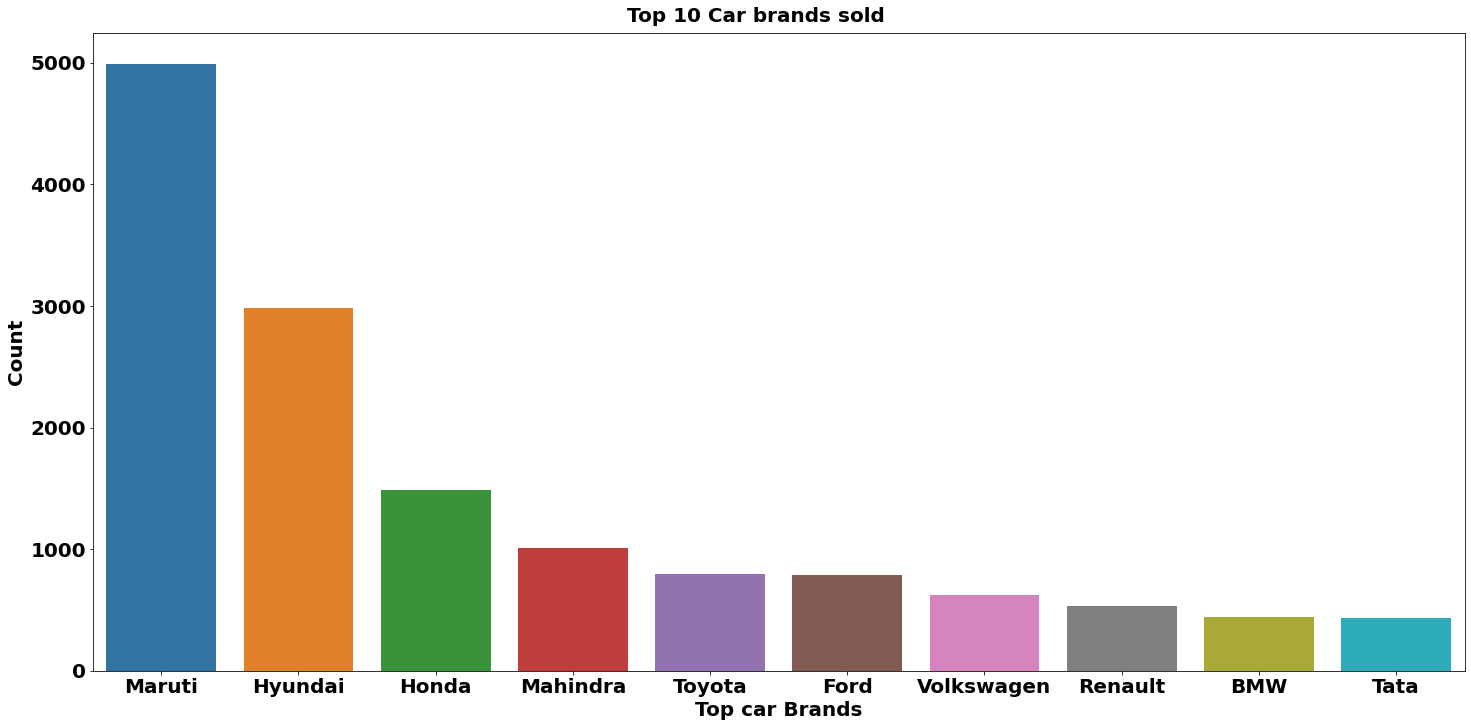

In [450]:
plt.figure(figsize=(20,10))
plt.suptitle(t='Top 10 Car brands sold',fontsize=20,fontweight='bold')
sns.countplot(x=df['brand'],order=df['brand'].value_counts()[:10].index)
plt.tight_layout()
plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.xlabel('Top car Brands',fontsize=20,fontweight='bold')
plt.ylabel('Count',fontsize=20,fontweight='bold')

In [457]:
Maruti_Mean_Price=df[df['brand']=='Maruti']['selling_price'].mean()
print("Mean selling price of the maruti branded cars is {} rupees".format(Maruti_Mean_Price))

Mean selling price of the maruti branded cars is 487089.3179086539 rupees


Report:
- Maruti brand cars are msotly solded cars on the Cardekho website  which is follwed by hyundai.
- Mean Selling price of Maruti Branded cars is 4.87Lakhs.

# Costliest Brand

In [458]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [572]:
brand=df.groupby('brand').selling_price.max()
brand_df=brand.to_frame().sort_values('selling_price',ascending=False)[:10]

In [574]:
brand_df

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


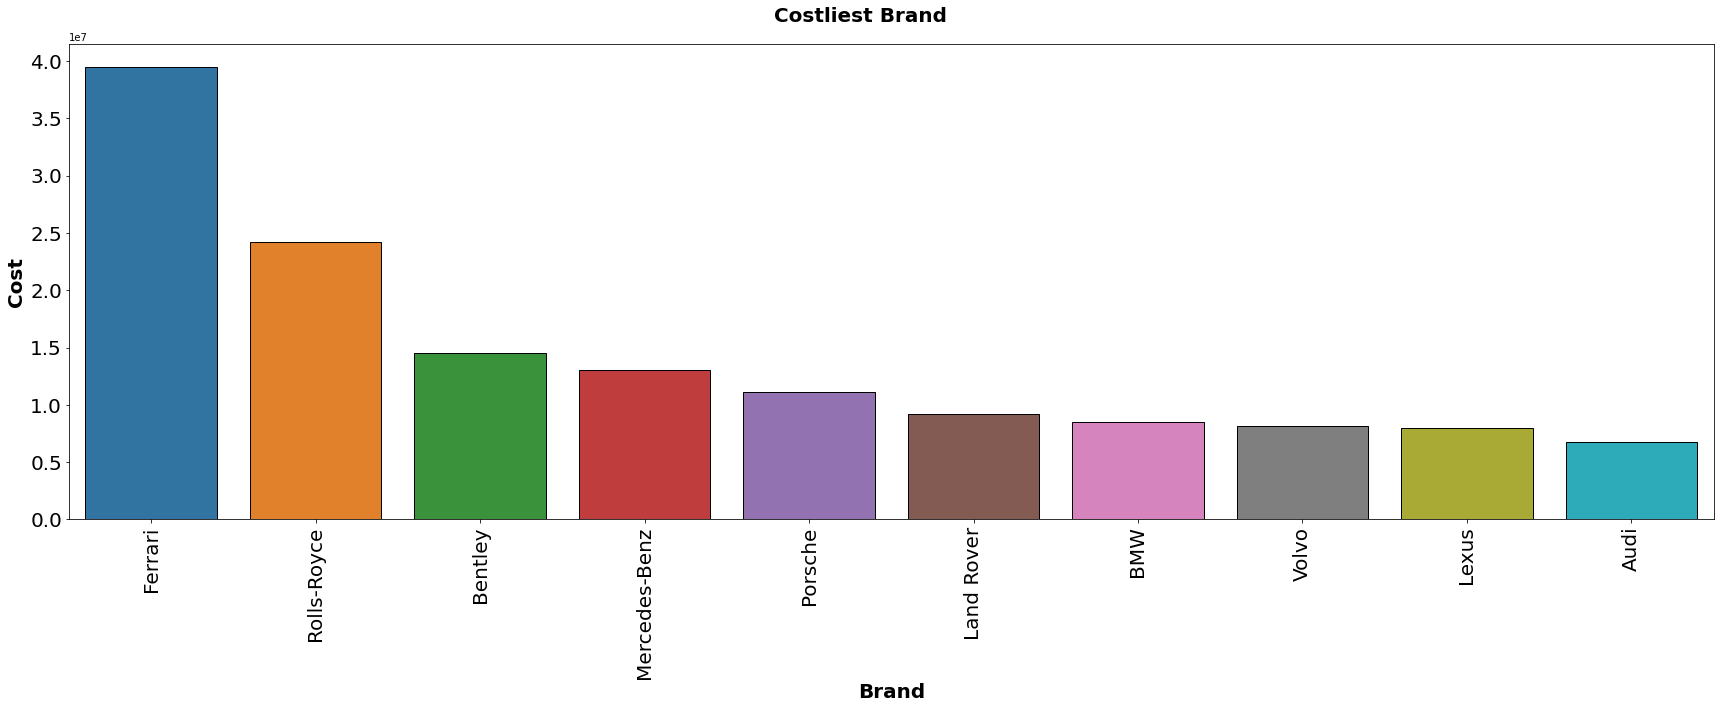

In [577]:
plt.figure(figsize=(24,10))
sns.barplot(x=brand_df.index,y=brand_df.selling_price,ec='black')
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.suptitle(t='Costliest Brand',fontsize=20,fontweight='bold')
plt.xlabel('Brand',fontsize=20,fontweight='bold')
plt.ylabel('Cost',fontsize=20,fontweight='bold')
plt.tight_layout()

In [578]:
brand_df

,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


Report:
- Costlestis is ferrari brand which costs 3.95 Crores and followed by Rolls royce cost of 2.42 Crores.

# Costliest Car

In [538]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [579]:
Car=df.groupby('car_name').selling_price.max()

In [580]:
Car_df=Car.to_frame().sort_values('selling_price',ascending=False)[:10]

In [582]:
Car_df

,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


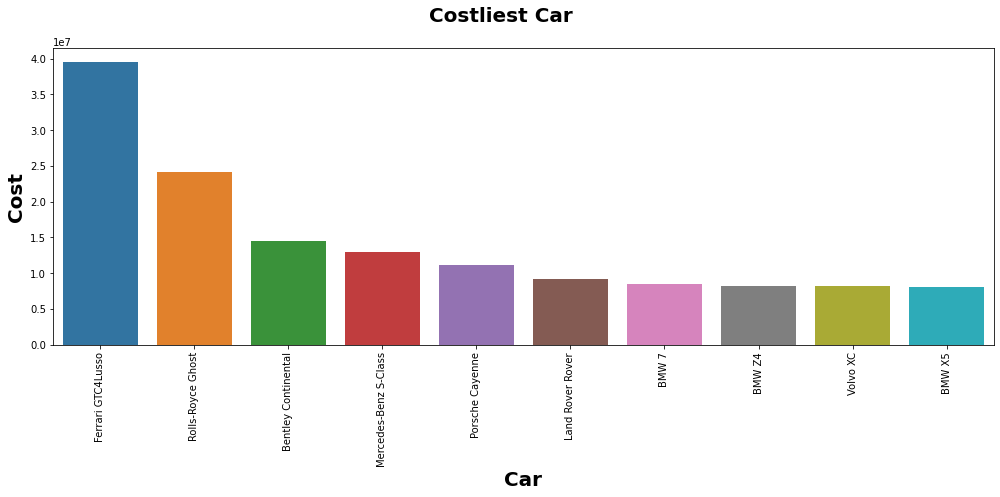

In [585]:
plt.figure(figsize=(14,7))
plt.suptitle(t='Costliest Car',fontsize=20,fontweight='bold')
sns.barplot(x=Car_df.index,y=Car_df.selling_price)
plt.xticks(rotation=90)
plt.xlabel('Car',fontsize=20,fontweight='bold')
plt.ylabel('Cost',fontsize=20,fontweight='bold')
plt.tight_layout()

Report:
- Ferrari GTC4Lusso	is the Costliest car(3.95 Crores) followed by Rolls-Royce Ghost.

# Most Mileage Brand Name

In [587]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [609]:
brand_mileage=df.groupby('brand').mileage.mean()

In [610]:
brand_mileage_df=brand_mileage.to_frame().sort_values('mileage',ascending=False)[:10]

In [611]:
brand_mileage_df

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


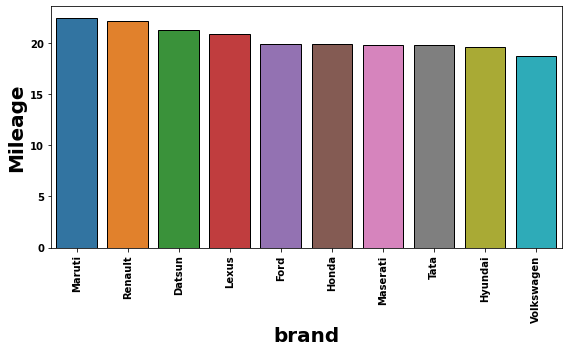

In [613]:
plt.figure(figsize=(8,5))
sns.barplot(x=brand_mileage_df.index,y=brand_mileage_df.mileage,ec='black')
plt.xlabel('brand',fontsize=20,fontweight='bold')
plt.ylabel('Mileage',fontsize=20,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold',rotation=90)
plt.yticks(fontsize=10,fontweight='bold')
plt.tight_layout()

Report:
- Maruti is the brand which gives more mileage comapred to other brands

# High Mileage Car Name

In [615]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [620]:
car_mileage=df.groupby('car_name').mileage.mean().sort_values(ascending=False)[:10]

In [621]:
car_mileage_df=car_mileage.to_frame()

In [622]:
car_mileage_df

,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


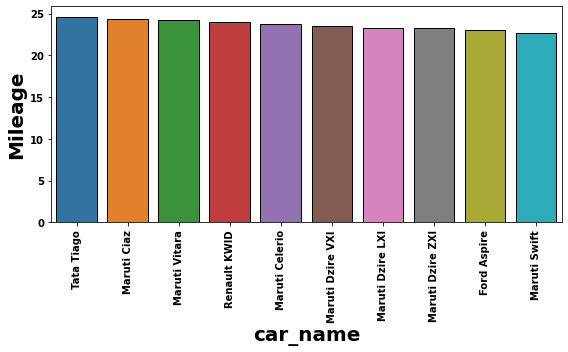

In [626]:
plt.figure(figsize=(8,5))
sns.barplot(x=car_mileage_df.index,y=car_mileage_df.mileage,ec='black')
plt.xlabel('car_name',fontsize=20,fontweight='bold')
plt.ylabel('Mileage',fontsize=20,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold',rotation=90)
plt.yticks(fontsize=10,fontweight='bold')
plt.tight_layout()

Report:
- Tata Tiago is the Car which gives the highest mileage followed by maruti Ciaz.

# Kilometer driven Vs Selling Price

In [628]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


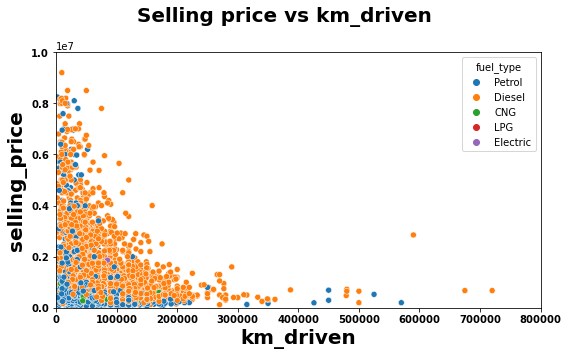

In [658]:
plt.figure(figsize=(8,5))
plt.suptitle(t='Selling price vs km_driven',fontsize=20,fontweight='bold')
sns.scatterplot(x=df.km_driven,y=df.selling_price,hue=df.fuel_type)
plt.ylim(0,1e7)
plt.xlim(0,800000)
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.xlabel('km_driven',fontsize=20,fontweight='bold')
plt.ylabel('selling_price',fontsize=20,fontweight='bold')
plt.tight_layout()

Report:
- Low km driven cars has high selling price.

# Selling price vs Fuel Type

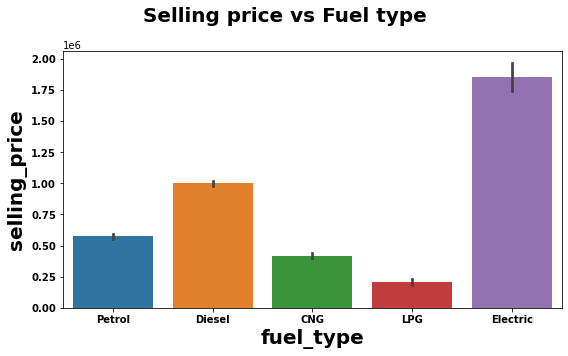

In [669]:
plt.figure(figsize=(8,5))
plt.suptitle(t='Selling price vs Fuel type',fontsize=20,fontweight='bold')
sns.barplot(x=df.fuel_type,y=df.selling_price)
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.xlabel('fuel_type',fontsize=20,fontweight='bold')
plt.ylabel('selling_price',fontsize=20,fontweight='bold')
plt.tight_layout()

Report
- Electric cars have highest selling price followed by diesel cars.

# Fuel type-solded cars

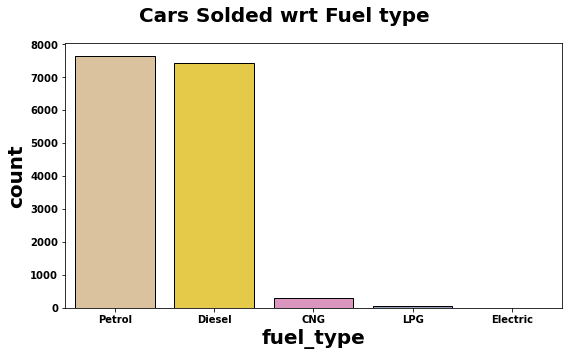

In [670]:
plt.figure(figsize=(8,5))
plt.suptitle(t='Cars Solded wrt Fuel type',fontsize=20,fontweight='bold')
sns.countplot(x=df.fuel_type,ec='black',palette="Set2_r")
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.xlabel('fuel_type',fontsize=20,fontweight='bold')
plt.ylabel('count',fontsize=20,fontweight='bold')
plt.tight_layout()

Report:
- Petrol variant cars are the most solded and followed by diesel cars.
- Least sold cars are the Electric.

# Fuel_types vs Mileage

In [671]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [682]:
Fuel_mileage=df.groupby('fuel_type').mileage.mean()

In [686]:
Fuel_mileage_df=Fuel_mileage.to_frame().sort_values('mileage',ascending=False)[:10]

In [687]:
Fuel_mileage_df

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


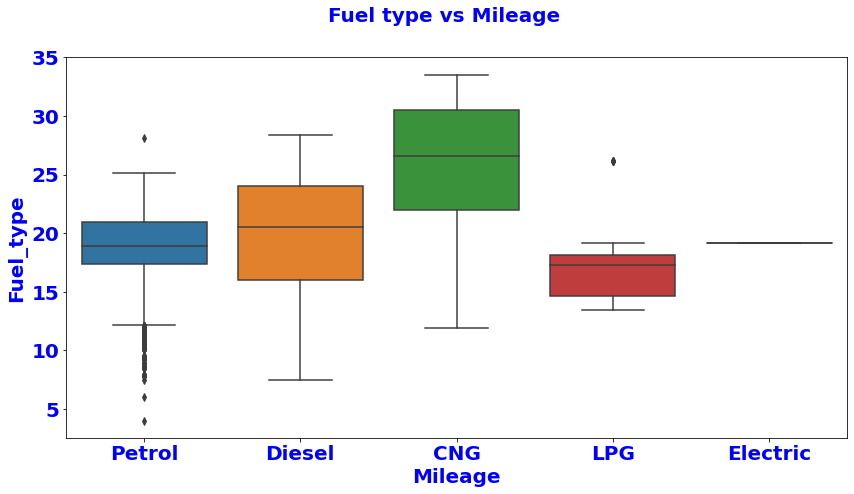

In [704]:
plt.figure(figsize=(14,7))
plt.suptitle(t='Fuel type vs Mileage',fontsize=20,fontweight='bold',color='b')
sns.boxplot(x=df.fuel_type,y=df.mileage)
plt.xlabel(xlabel='Mileage',fontsize=20,fontweight='bold',color='b')
plt.ylabel(ylabel='Fuel_type',fontsize=20,fontweight='bold',color='b')
plt.xticks(fontsize=20,fontweight='bold',color='b')
plt.yticks(fontsize=20,fontweight='bold',color='b')
plt.show()

Report:
- CNG cars are giving more mileage followed by Diesel.
- LPG Cars are giving less mileage.

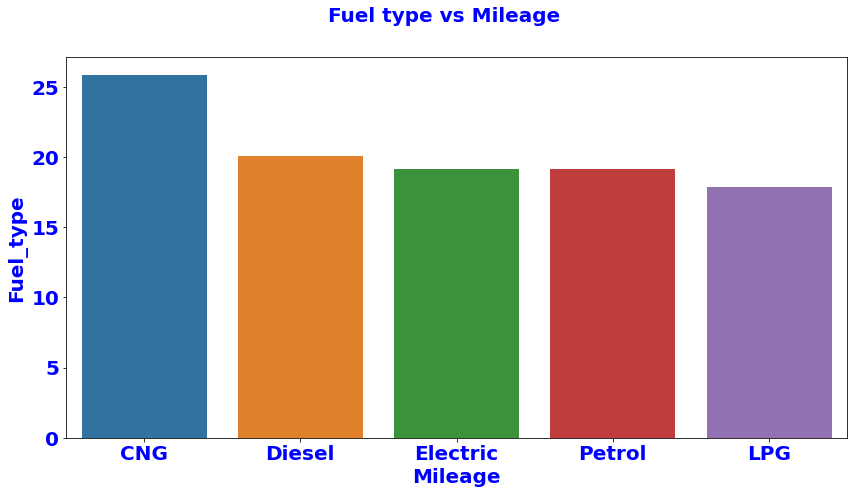

In [705]:
plt.figure(figsize=(14,7))
plt.suptitle(t='Fuel type vs Mileage',fontsize=20,fontweight='bold',color='b')
sns.barplot(x=Fuel_mileage_df.index,y=Fuel_mileage_df.mileage)
plt.xlabel(xlabel='Mileage',fontsize=20,fontweight='bold',color='b')
plt.ylabel(ylabel='Fuel_type',fontsize=20,fontweight='bold',color='b')
plt.xticks(fontsize=20,fontweight='bold',color='b')
plt.yticks(fontsize=20,fontweight='bold',color='b')
plt.show()

Report:
- CNG is giving more mileage followed by Diesel Cars.

# Mileage VS Selling Price

In [706]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


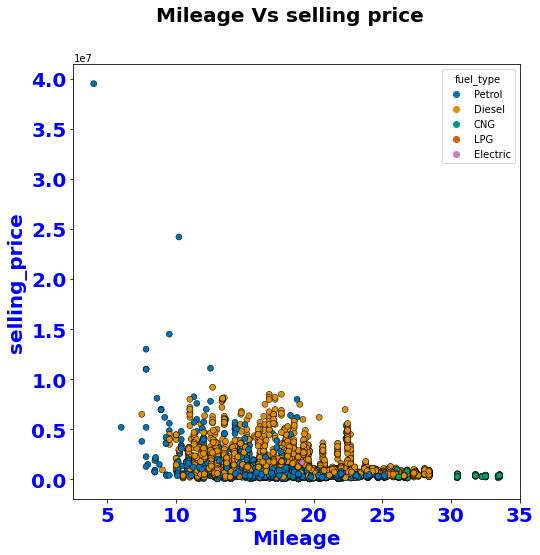

<Figure size 432x288 with 0 Axes>

In [717]:
plt.figure(figsize=(8,8))
plt.suptitle(t='Mileage Vs selling price',fontsize=20,fontweight='bold')
sns.scatterplot(x=df.mileage,y=df.selling_price,hue=df.fuel_type,ec='black',palette='colorblind')
plt.xlabel(xlabel='Mileage',fontsize=20,fontweight='bold',color='b')
plt.ylabel(ylabel='selling_price',fontsize=20,fontweight='bold',color='b')
plt.xticks(fontsize=20,fontweight='bold',color='b')
plt.yticks(fontsize=20,fontweight='bold',color='b')
plt.show()
plt.tight_layout()

<AxesSubplot:xlabel='mileage', ylabel='Count'>

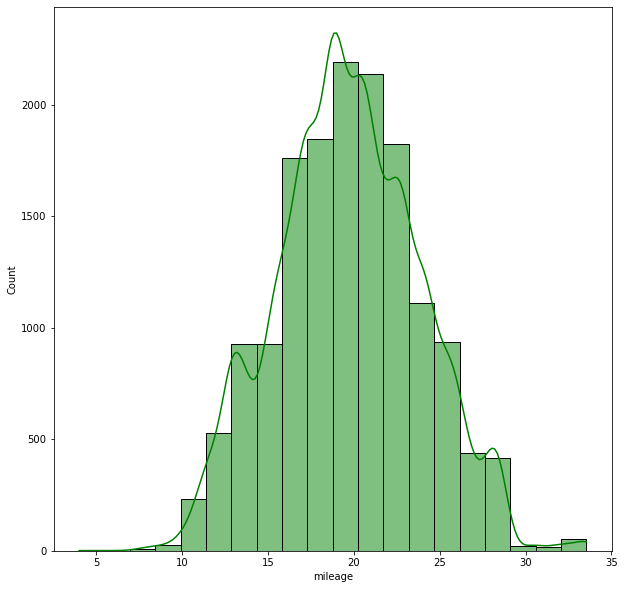

In [729]:
plt.figure(figsize=(10,10))
sns.histplot(df.mileage,kde=True,bins=20,color='green')

# Vehicle age Vs Selling Price

In [730]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


<AxesSubplot:xlabel='vehicle_age', ylabel='selling_price'>

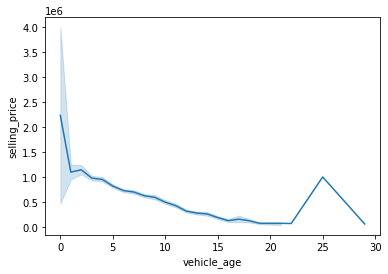

In [731]:
sns.lineplot(x=df.vehicle_age,y=df.selling_price)

Report:
- Selling price is decreasing with increase in vehicle age

# Vehicle age Vs Mileage

<AxesSubplot:xlabel='vehicle_age', ylabel='mileage'>

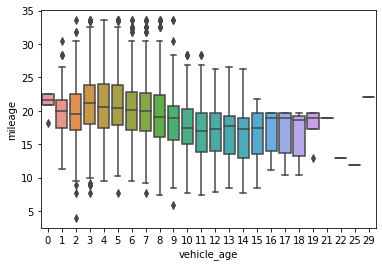

In [735]:
sns.boxplot(x=df.vehicle_age,y=df.mileage)

Report:
- Mileage of the car dropping with aging.

# Oldest Car

In [737]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [751]:
car_age=df.groupby('car_name').vehicle_age.max().sort_values(ascending=False)[:10]
car_age_df=car_age.to_frame()

In [752]:
car_age_df

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Bolero,18
Mahindra Scorpio,18
Skoda Octavia,18
Honda CR-V,17
Mercedes-Benz E-Class,17


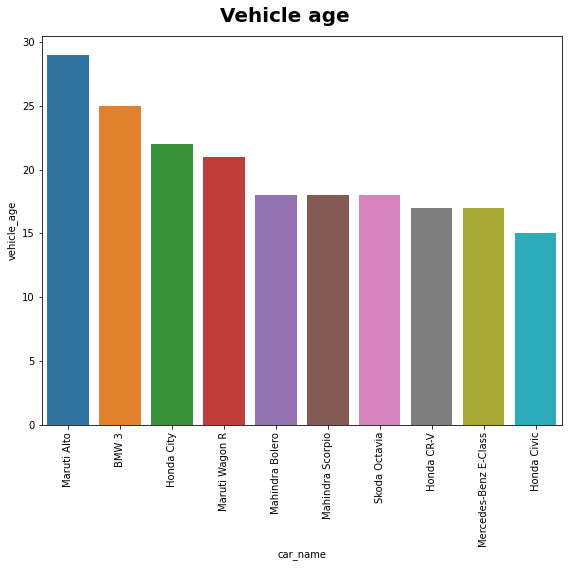

In [761]:
plt.figure(figsize=(8,8))
plt.suptitle(t='Vehicle age',fontsize=20,fontweight='bold')
sns.barplot(x=car_age_df.index,y=car_age_df.vehicle_age)
plt.xticks(rotation=90)
plt.tight_layout()

Report:
- Maruti Alto is the oldest car of 29 years followed by BMW 3 is of 25 years old.

# Transmission Type

In [762]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


<AxesSubplot:xlabel='transmission_type', ylabel='count'>

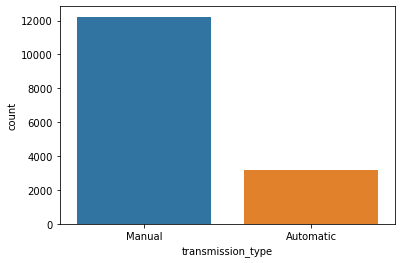

In [764]:
sns.countplot(x=df.transmission_type)

In [765]:
df.transmission_type.value_counts()

Manual       12225
Automatic     3186
Name: transmission_type, dtype: int64

<AxesSubplot:xlabel='transmission_type', ylabel='selling_price'>

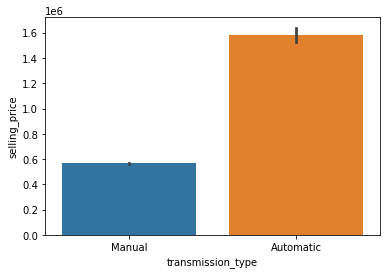

In [766]:
sns.barplot(x=df.transmission_type,y=df.selling_price)

Report
- Majority of the Cars have Manual transmission.
- Cars with Manual transmission are cheaper compared to cars with Automatic Transmission

In [777]:
seller=df.groupby('seller_type').selling_price.median()
seller_f=seller.to_frame()

In [778]:
seller_f

,selling_price
seller_type,
Dealer,591000.0
Individual,507000.0
Trustmark Dealer,540000.0


Report:
- Dealers have more selling price median followed by Individual.
- Median selling price by Dealer is 5.91lakhs.

# Engine Capacity

In [782]:
eng=df.groupby('brand').engine.mean().sort_values(ascending=False)[:10]
eng_df=eng.to_frame()

In [783]:
eng_df

,engine
brand,
Rolls-Royce,6592.000000
Bentley,5998.000000
Ferrari,3855.000000
Porsche,3282.380952
ISUZU,2999.000000
Mercedes-AMG,2996.000000
Maserati,2987.000000
Lexus,2683.200000
Force,2596.000000


Text(0, 0.5, 'Engine Capacity')

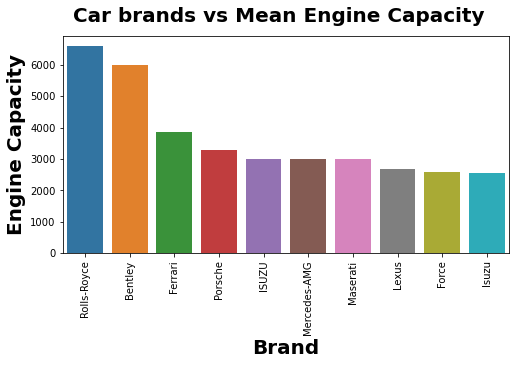

In [791]:
plt.figure(figsize=(8,4))
plt.suptitle(t='Car brands vs Mean Engine Capacity',fontsize=20,fontweight='bold')
sns.barplot(x=eng_df.index,y=eng_df.engine)
plt.xticks(rotation=90)
plt.xlabel(xlabel='Brand',fontsize=20,fontweight='bold')
plt.ylabel(ylabel='Engine Capacity',fontsize=20,fontweight='bold')

Report:
- Rolls royace has cars with mean engine capacity of 6592cc followed by Bentley with capacity of 5998cc

# Final Report

* Dataset is about used car prices along with different detials like Car Brand,Model,Age,Engine CC,Transimission 
  type,Mileage,type of seller and the selling price.
* Datset has 15411 used cars sales data.
* Data has 7 Numerical features and 6 Categorical features.
* Numerical features:'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price'.
* In Numerical features,except 'Seats' all are continous features.
* Categorical features:'car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type'
* No NaN Values observed in any feature.
* Vehicle Age,Engine capcity,Max power,seats and selling price features are having right skewed distribution.
* Based on the boxplot all Numerical features have outliers.
* Traget variable selling price has positive correlation with the max power and the Engine Capacity.and Negative Correlation with with Features like Vehicle age.
* Most sold car on cardekho website is Hyundai I20 and it is followed by Maruti Swift Dzire and Mean price of the Hyundai i20 car is 5.43Lakhs.
* Maruti brand cars are mostly solded cars on the Cardekho website which is follwed by hyundai.ean Selling price of Maruti Branded cars is 4.87Lakhs
* Ferrari GTC4Lusso	is the Costliest car(3.95 Crores) followed by Rolls-Royce Ghost.
* Maruti is the brand which gives more mileage comapred to other brands.
* Tata Tiago is the Car which gives the highest mileage followed by maruti Ciaz.
* Electric cars have highest selling price followed by diesel cars.
* Petrol variant cars are the most solded and followed by diesel cars and Least sold cars are the Electric.
* CNG cars are giving more mileage followed by Diesel and LPG Cars are giving less mileage.
* Mileage of the car dropping with aging.
* Maruti Alto is the oldest car of 29 years followed by BMW 3 is of 25 years old.
* Majority of the Cars have Manual transmission and Cars with Manual transmission are cheaper compared to cars with Automatic Transmission.
* Rolls royace has cars with mean engine capacity of 6592cc followed by Bentley with capacity of 5998cc.